# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Lab/CLV.csv")

In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,), (20,20,), (10,20,10,)], 
    "activation" : ['relu','logistic','tanh'],
    "alpha": [0.001, 0.001, 0.01]
}

In [11]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20, 5), (20, 20),
                                                (10, 20, 10)]})

In [54]:
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 20, 10)}
Best score: 0.06624765266089401


# 3.) Train a model with the optimal solution from GridSearch

In [48]:
model = MLPRegressor(**grid.best_params_)

In [49]:
model

MLPRegressor(alpha=0.01, hidden_layer_sizes=(10, 20, 10))

In [50]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, hidden_layer_sizes=(10, 20, 10))

# 4.) What are the in-sample and out of sample MSEs

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
# In-sample MSE
mean_squared_error(
  y_train,
  model.predict(X_train)
)

42662944.91960221

In [53]:
# Out of sample MSE
mean_squared_error(
  y_test,
  model.predict(X_test)
)

44599355.645670384

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [55]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [56]:
# Create Architecture
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))


In [57]:
# Train Model
model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


640/640 [==============================] - 2s 2ms/step - loss: 50716588.0000
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 43893260.0000
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 43472656.0000
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 43405940.0000
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 43370356.0000
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 43192672.0000
Epoch 7/100
640/640 [==============================] - 1s 2ms/step - loss: 43203760.0000
Epoch 8/100
640/640 [==============================] - 1s 2ms/step - loss: 42908568.0000
Epoch 9/100
640/640 [==============================] - 2s 2ms/step - loss: 43029812.0000
Epoch 10/100
640/640 [==============================] - 2s 2ms/step - loss: 43028380.0000
Epoch 11/100
640/640 [==============================] - 1s 2ms/step - loss: 42924216.0000
Epoch 12/100
640/640 [=========

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [59]:
from keras.utils import plot_model

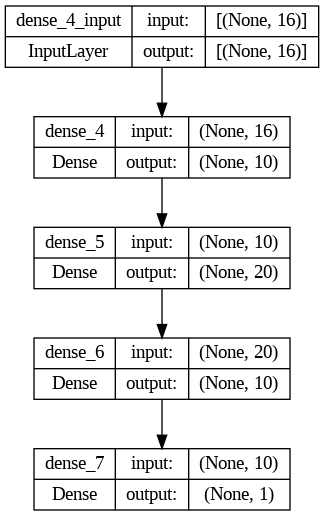

In [60]:
# Using plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [30]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from ann_visualizer.visualize import ann_viz

In [62]:
# Using ann_viz
ann_viz(model, title="CLV NN Viz", filename="/content/nn_model")

In [36]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (371 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


In [63]:
from pdf2image import convert_from_path

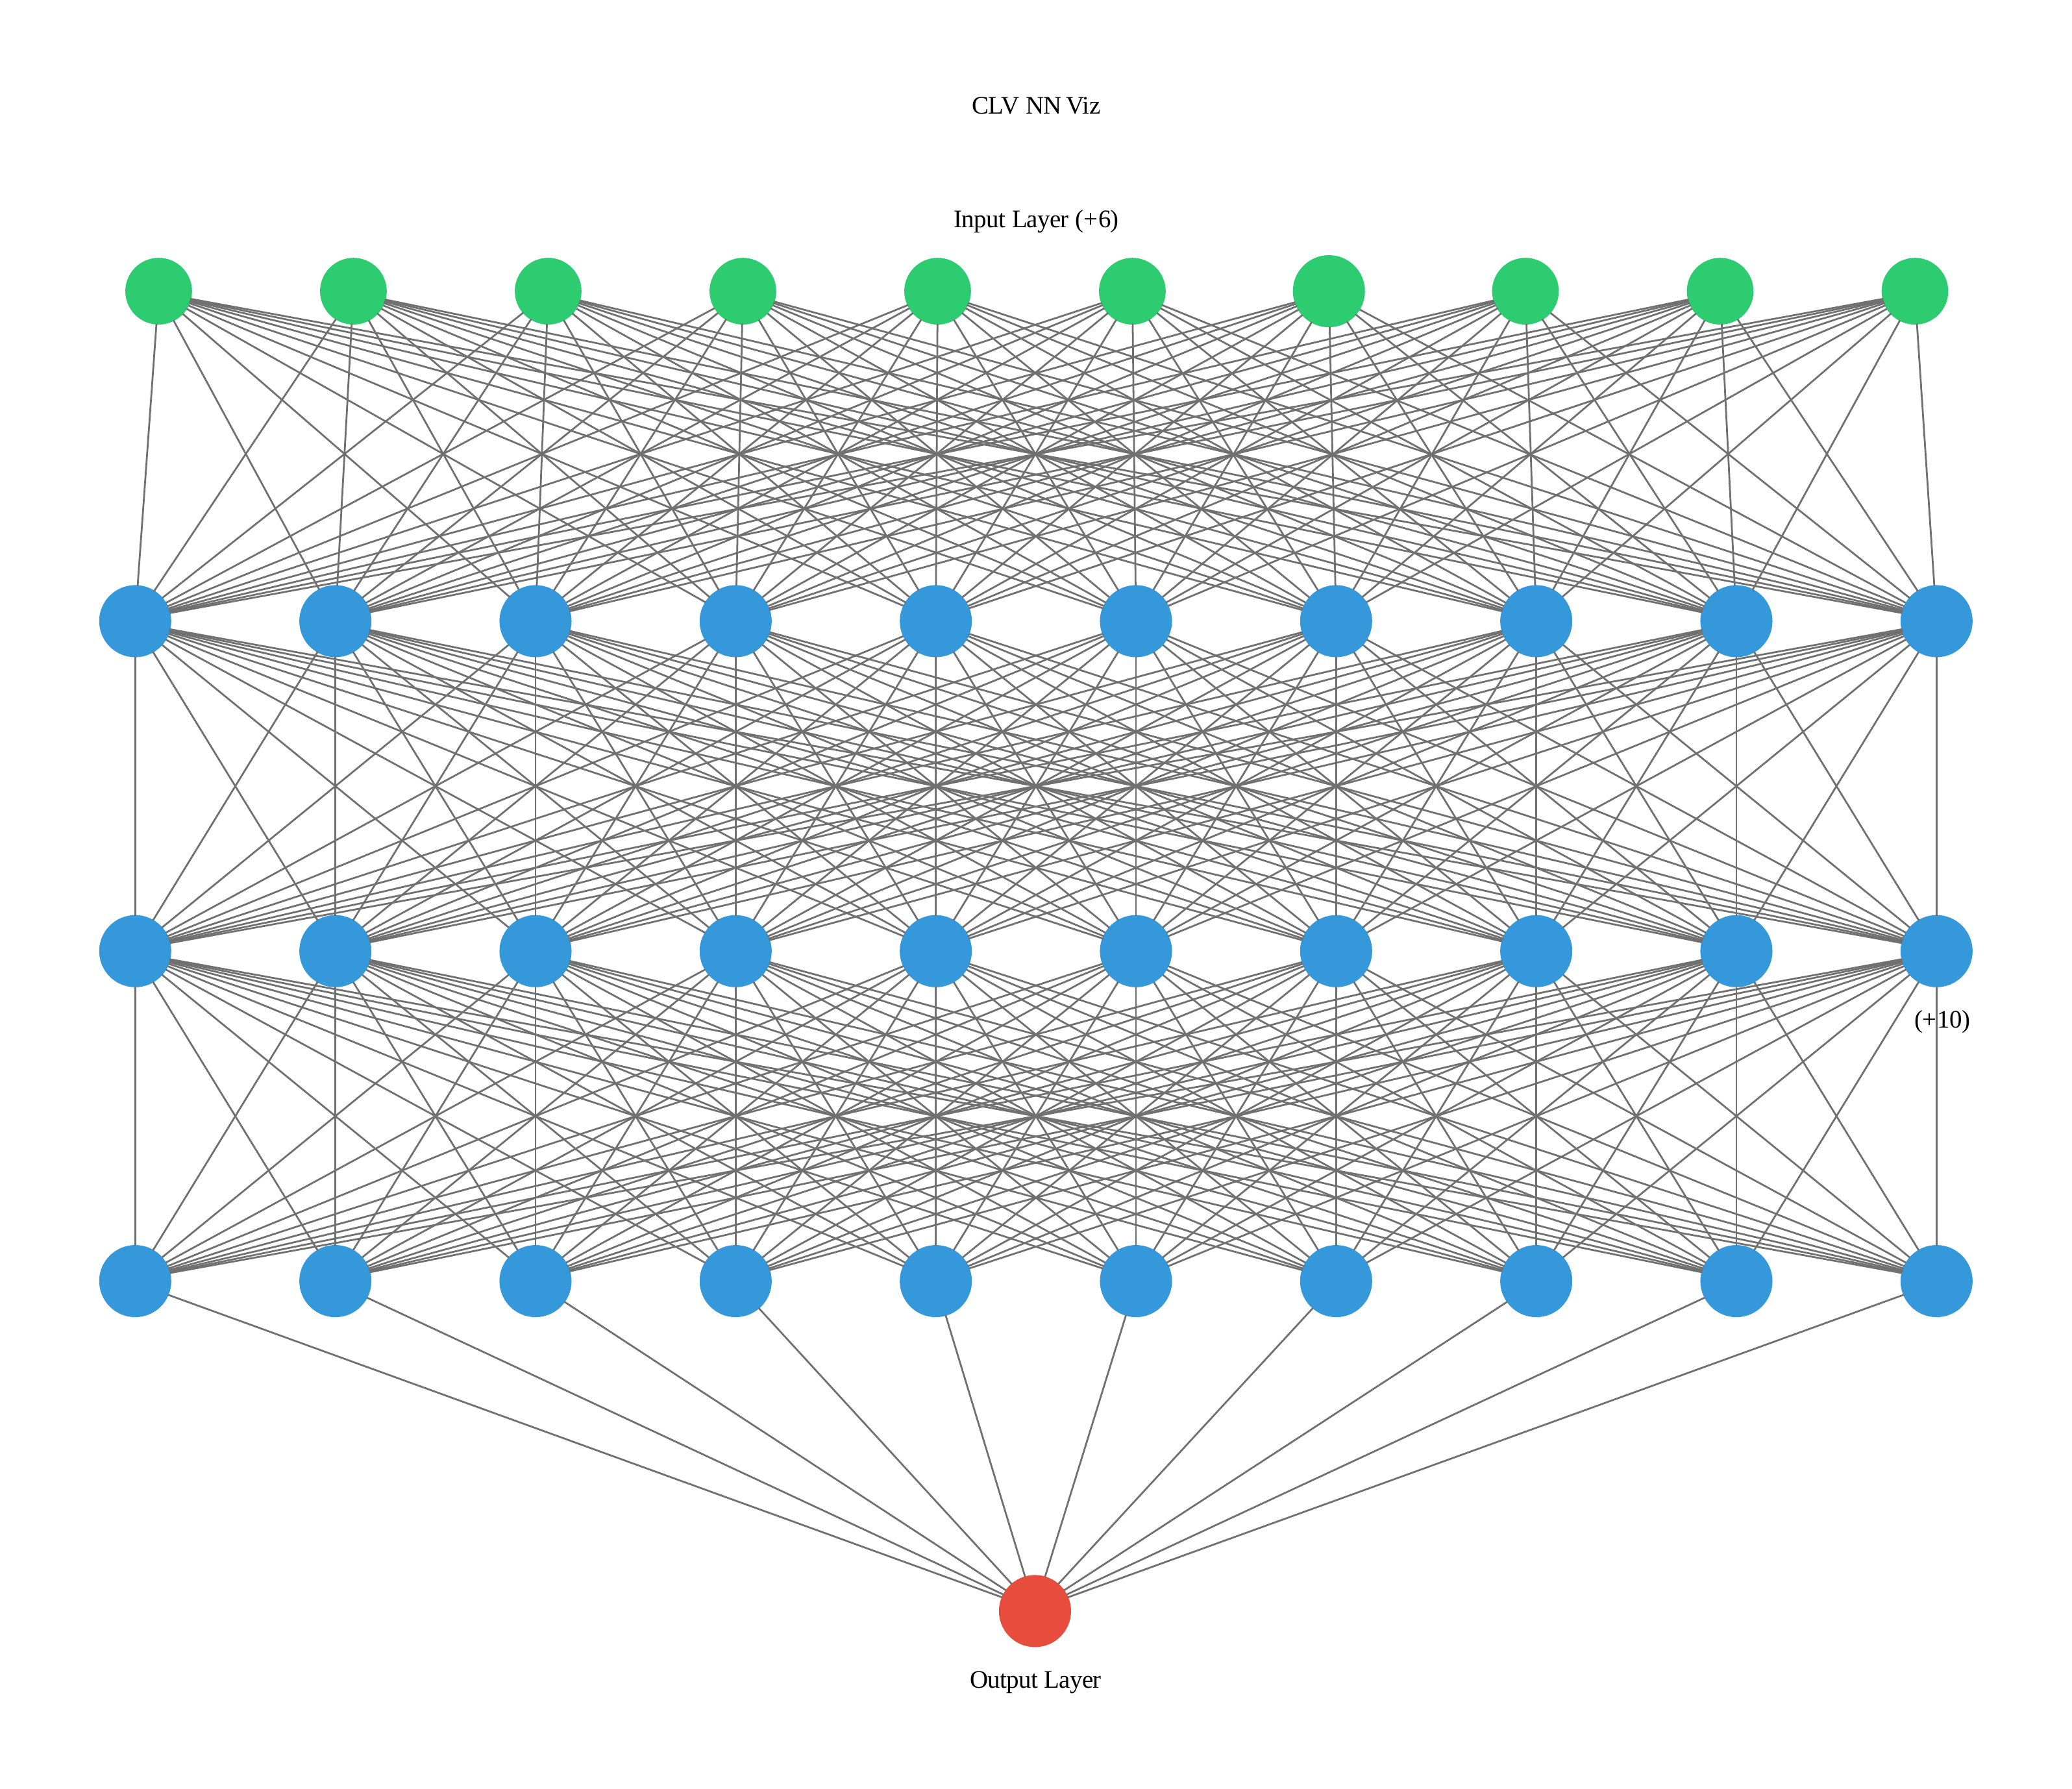

In [64]:
images = convert_from_path("/content/nn_model.pdf")
images[0]